## Importing required packages and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.ensemble import RandomForestClassifier

In [3]:
chd_df = pd.read_csv("azcabgptca.csv")

## Checking the data

In [4]:
chd_df.head(10) 

,died,procedure,age,gender,los,type
0,0,1,73,0,51,0
1,0,0,67,0,30,1
2,0,1,69,0,43,0
3,0,1,65,0,32,0
4,0,1,79,0,42,1
5,0,1,68,0,33,1
6,0,0,74,0,22,1
7,0,1,66,0,30,1
8,0,1,66,0,30,0
9,0,0,65,1,9,1


In [5]:
chd_df.shape

(1959, 6)

In [6]:
chd_df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1959 entries, 0 to 1958
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   died       1959 non-null   int64
 1   procedure  1959 non-null   int64
 2   age        1959 non-null   int64
 3   gender     1959 non-null   int64
 4   los        1959 non-null   int64
 5   type       1959 non-null   int64
dtypes: int64(6)
memory usage: 92.0 KB


Gender column is of type object i.e. strings. This need to be converted to ordinal type for building RF model

# EDA

### Summary of the data

In [7]:
chd_df.describe(include="all")

,died,procedure,age,gender,los,type
count,1959.000000,1959.000000,1959.000000,1959.000000,1959.000000,1959.000000
mean,0.018377,0.474222,71.177642,0.692700,7.282797,0.456355
std,0.134344,0.499463,4.024198,0.461492,5.601206,0.498219
min,0.000000,0.000000,65.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,68.000000,0.000000,3.000000,0.000000
50%,0.000000,0.000000,71.000000,1.000000,7.000000,0.000000
75%,0.000000,1.000000,74.000000,1.000000,10.000000,1.000000
max,1.000000,1.000000,79.000000,1.000000,51.000000,1.000000


### Frequency of the levels in the Gender column

In [8]:
# Get the count of Male and Female
chd_df.gender.value_counts()

1    1357
0     602
Name: gender, dtype: int64

### Proportion of observations in each of the target classes

In [9]:
chd_df['died'].value_counts()

0    1923
1      36
Name: died, dtype: int64

In [10]:
# Get the proportion in each class
chd_df['died'].value_counts(normalize=True)

0    0.981623
1    0.018377
Name: died, dtype: float64

### Check for duplicate data

In [11]:
# Are there any duplicates ?
dups = chd_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
chd_df[dups]

Number of duplicate rows = 1058


,died,procedure,age,gender,los,type
12,0,0,65,1,7,1
13,0,0,65,1,7,1
17,0,0,65,1,5,1
19,0,0,65,1,4,0
21,0,0,65,1,4,1
...,...,...,...,...,...,...
1938,0,1,75,0,8,1
1946,0,1,78,0,9,1
1949,0,1,78,0,8,0
1950,0,1,78,0,8,0


There are no duplicates in the data

### Check for missing value in any column

In [12]:
# Are there any missing values ?
chd_df.isnull().sum()

died         0
procedure    0
age          0
gender       0
los          0
type         0
dtype: int64

Missing values exists for all the independent varibles with some variables having very high missing values

In [13]:
chd_df.dropna().shape

(1959, 6)

If we were to drop all the observations having missing values, then number of observations reduces from 4240 to 3616 rows for the same 16 columns.

As we see in the below boxplot continuous variables have outliers present.

So, we will impute the continuous variables with median value, and drop the missing values corresponding to categorical variables.

In [14]:
chd_df.isnull().sum()

died         0
procedure    0
age          0
gender       0
los          0
type         0
dtype: int64

Only categorical variables have misisng values now

### Checking pairwise distribution of the continuous variables

In [15]:
chd_df.head(10)

,died,procedure,age,gender,los,type
0,0,1,73,0,51,0
1,0,0,67,0,30,1
2,0,1,69,0,43,0
3,0,1,65,0,32,0
4,0,1,79,0,42,1
5,0,1,68,0,33,1
6,0,0,74,0,22,1
7,0,1,66,0,30,1
8,0,1,66,0,30,0
9,0,0,65,1,9,1


Female converted to 0, and Male to 1

In [16]:
chd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1959 entries, 0 to 1958
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   died       1959 non-null   int64
 1   procedure  1959 non-null   int64
 2   age        1959 non-null   int64
 3   gender     1959 non-null   int64
 4   los        1959 non-null   int64
 5   type       1959 non-null   int64
dtypes: int64(6)
memory usage: 92.0 KB


### Capture the target column into separate vectors for training set and test set

In [17]:
X = chd_df.drop(["died"], axis=1)

y = chd_df.pop("died")

### Splitting data into training and test set

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=0)


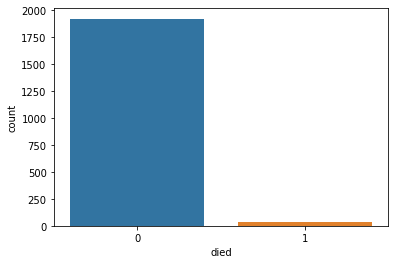

In [51]:
sns.countplot(y)

In [19]:
train_labels.value_counts()

0    1342
1      29
Name: died, dtype: int64

In [20]:
train_labels.value_counts(normalize=True)

0    0.978848
1    0.021152
Name: died, dtype: float64

In [21]:
test_labels.value_counts()

0    581
1      7
Name: died, dtype: int64

In [22]:
test_labels.value_counts(normalize=True)

0    0.988095
1    0.011905
Name: died, dtype: float64

Observations are almost equally distributed between the train and test sets w.r.t target classes

# Ensemble RandomForest Classifier

#### Building the Random Forest model

**Importance of Random State**

**The important thing is that everytime you use any natural number, you will always get the same output the first time you make the model which is similar to random state while train test split**

In [23]:
# To understand the differences of different random states affecting Out-of-Bag score
random_state=[0,23,42]
for i in random_state:
    rf=RandomForestClassifier(random_state=i,oob_score=True)
    rf.fit(X_train,train_labels)
    print(rf.oob_score_)

0.9773887673231219
0.9773887673231219
0.975200583515682


In [24]:
#Build a RandomForestCassifier wit n_estimators 100, max_features 6, andfit it on the training data
rfcl = RandomForestClassifier(n_estimators=501,oob_score=True,max_depth=10,max_features=5,min_samples_leaf=50,min_samples_split=110,random_state=0)
rfcl = rfcl.fit(X_train, train_labels)

In [53]:
rfcl = RandomForestClassifier(n_estimators=500,random_state=0)
rfcl = rfcl.fit(X_train, train_labels)

In [25]:
rfcl.oob_score_

0.9788475565280816

In [26]:
1-0.9788475565280816

0.02115244347191836

##### Predicting Train and Test data with the RF Model

In [54]:
ytrain_predict = rfcl.predict(X_train)
ytest_predict = rfcl.predict(X_test)

**Train Accuracy**


In [55]:
rfcl.score(X_train,train_labels)

0.9927060539752006

#### Evaluating model performance with confusion matrix

In [57]:
from sklearn.metrics import confusion_matrix,classification_report

#### Evaluating model performance on the training data

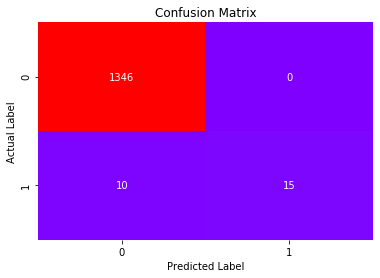

In [58]:
# Get the confusion matrix on the train data
confusion_matrix(train_labels,ytrain_predict)
sns.heatmap(confusion_matrix(train_labels,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [31]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1342
           1       0.00      0.00      0.00        29

    accuracy                           0.98      1371
   macro avg       0.49      0.50      0.49      1371
weighted avg       0.96      0.98      0.97      1371



C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
print('Accuracy', ((2424+414)/(2424+414)))
print('Sensitivity',((414/414))) #TP/Actual yes
print('Specificity',(2424/2424)) #TN/Actual no
print('Precision',(414/414)) #TP/Predicted yes

Accuracy 1.0
Sensitivity 1.0
Specificity 1.0
Precision 1.0


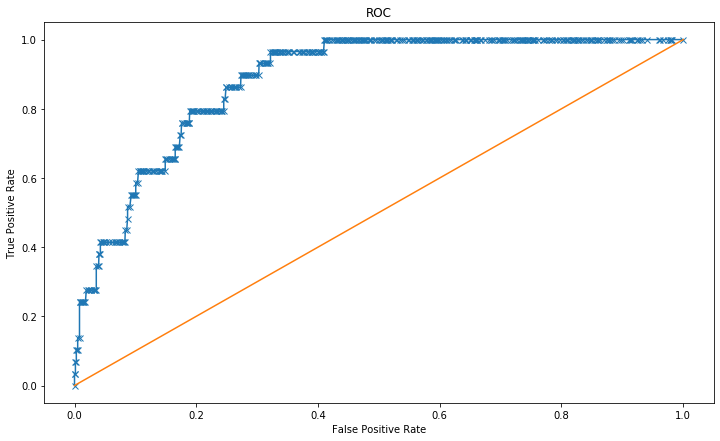

Area under Curve is 0.8823038182845984


In [33]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(train_labels,rfcl.predict_proba(X_train)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(train_labels,rfcl.predict_proba(X_train)[:,1]))

#### Evaluating model performance on the test data

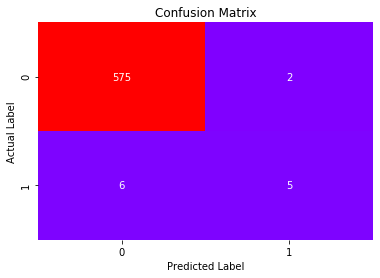

In [63]:
confusion_matrix(test_labels,ytest_predict)
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [62]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       577
           1       0.71      0.45      0.56        11

    accuracy                           0.99       588
   macro avg       0.85      0.73      0.77       588
weighted avg       0.98      0.99      0.98       588



In [36]:
print('Accuracy', ((1019+13)/(1019+3+182+13)))
print('Sensitivity',((13/(13+182)))) 
print('Specificity',(1019/(1019+3)))
print('Precision',(13/(13+3)))

Accuracy 0.847986852917009
Sensitivity 0.06666666666666667
Specificity 0.99706457925636
Precision 0.8125


**Test Accuracy**

In [56]:
rfcl.score(X_test,test_labels)

0.9863945578231292

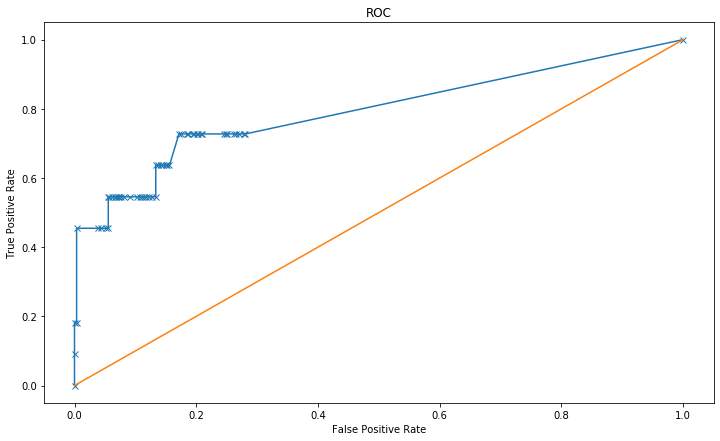

Area under Curve is 0.7923428391365999


In [60]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(test_labels,rfcl.predict_proba(X_test)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(test_labels,rfcl.predict_proba(X_test)[:,1]))

### Grid Search for finding out the optimal values for the hyper parameters

Note: runs for longer time on more data with more params

In [39]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5,7,10],
    'max_features': [4,6],
    'min_samples_leaf': [5,10],
    'min_samples_split': [50,100],
    'n_estimators': [100,200,300]
}

rfcl = RandomForestClassifier(random_state=0)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 10)

In [40]:
grid_search.fit(X_train, train_labels)

C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py",

C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py",

C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py",

C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py",

C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py",

C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py",

C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py",

C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py",

C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py",

C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py",

C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py",

C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py",

C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py",

C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py",

C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py",

C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py",

C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py",

C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py",

C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py",

C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py",

C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py",

C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py",

C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py",

C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py",

C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py",

C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py",

C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py",

C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py",

C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py",

C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py",

C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py",

C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py",

C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py",

C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py",

C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py",

C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py",

C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py",

C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py",

C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py",

C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py",

C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py",

C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py",

C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py",

C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py",

C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py",

C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py",

C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py",

C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py",

C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py",

C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py",

C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py",

C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py",

C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py",

C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py",

C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py",

C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py",

C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py",

C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py",

C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py",

C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py",

C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py",

C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py",

C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py",

C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py",

C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py",

C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py",

C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py",

C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py",

C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py",

C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py",

C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py",

C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py",

C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py",

C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py",

C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Srinidhi Devan\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 1004, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py", line 835, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Srinidhi Devan\anaconda3\lib\site-packages\joblib\parallel.py",

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5, 7, 10], 'max_features': [4, 6],
                         'min_samples_leaf': [5, 10],
                         'min_samples_split': [50, 100],
                         'n_estimators': [100, 200, 300]})

In [41]:
grid_search.best_params_

{'max_depth': 7,
 'max_features': 4,
 'min_samples_leaf': 5,
 'min_samples_split': 50,
 'n_estimators': 200}

In [42]:
best_grid = grid_search.best_estimator_

In [43]:
best_grid

RandomForestClassifier(max_depth=7, max_features=4, min_samples_leaf=5,
                       min_samples_split=50, n_estimators=200, random_state=0)

In [44]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [45]:
confusion_matrix(train_labels,ytrain_predict)


array([[1342,    0],
       [  23,    6]], dtype=int64)

In [46]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1342
           1       1.00      0.21      0.34        29

    accuracy                           0.98      1371
   macro avg       0.99      0.60      0.67      1371
weighted avg       0.98      0.98      0.98      1371



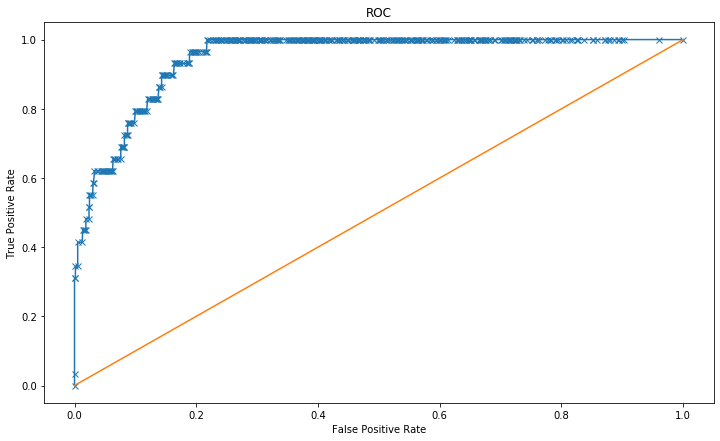

Area under Curve is 0.9472095174469397


In [47]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1]))

In [48]:
confusion_matrix(test_labels,ytest_predict)

array([[580,   1],
       [  3,   4]], dtype=int64)

In [49]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       581
           1       0.80      0.57      0.67         7

    accuracy                           0.99       588
   macro avg       0.90      0.78      0.83       588
weighted avg       0.99      0.99      0.99       588



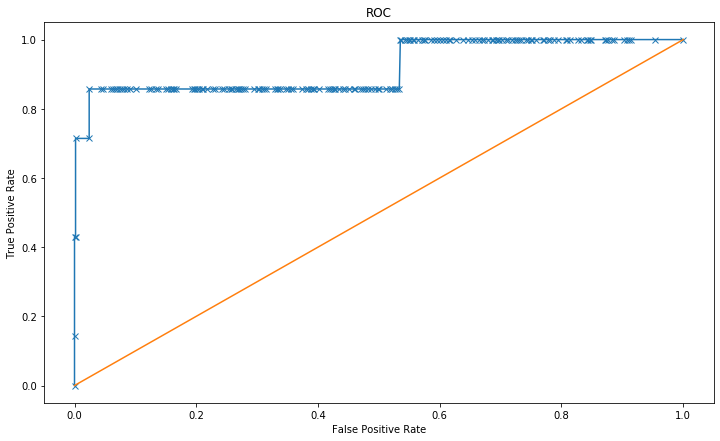

Area under Curve is 0.9197196951069584


In [50]:
#from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1]))